In [2]:
import os
import json
import time
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [17]:
os.chdir('C:\\Users\\Matteo\\Documents\\Università\\Dataset progetti\\AI Modena School\\arXiv dataset')

In [18]:
def replacements(s):
    return re.sub(' +', ' ', s).replace('\n', ' ').replace(' ','_').replace('$','').replace('\\','').replace('-->','').replace('/','_').replace('?','').replace('|','')

Store each article in its own json file

In [ ]:
os.makedirs('Articoli')

count = 0
start = time.time()
with open("arxiv-metadata-oai-snapshot.json", 'r') as f:
    for line in f:
        json_string = json.loads(line)
        idc = replacements(json_string['id'])
        cat = json_string['categories'].replace(' ','.').split('.')[0]
        if os.listdir('Articoli').count(cat)==0:
            os.makedirs('Articoli\\'+cat)
        with open('Articoli\\'+cat+'\\'+idc+'.json', 'w') as outfile:
            json.dump(json_string, outfile, indent=4)
            
            
        count += 1
        if count % 1000 == 0:
            print(count)
            check = time.time()
            print(check-start)
        if count == 1000000:
            break

Access data

In [20]:
data_list  = []
count = 0
start = time.time()
with open("arxiv-metadata-oai-snapshot.json", 'r') as f:
    for line in f:
        data_list.append(json.loads(line))
        count += 1
        if count % 100000 == 0:
            print(count)
            check = time.time()
            print(check-start)
            
        if count == 1000000:
            break

data = pd.DataFrame(data_list)
#list(data.columns)

data.head(5)

100000
3.3191890716552734
200000
6.492343902587891
300000
9.908198356628418
400000
15.938303232192993
500000
19.09451150894165
600000
22.889692783355713
700000
25.31608533859253
800000
29.54161262512207
900000
36.652419090270996
1000000
38.91438627243042


In [24]:
def clean_catagories(cate):
    return cate.replace(' ','.').split('.')[0]

categories = []
for i in data['categories']:
    categories.append(clean_catagories(i))
categories = pd.Series(categories)

def clean_abstracts(abst):
    return abst.replace('\n', ' ').strip()
    
abstracts = []

for i in data['abstract']:
    abstracts.append(clean_abstracts(i))

In [36]:
cat_codes = sorted(list(set(categories)))

cat_names = ['Astrophysics', 'Condensed Matter', 'Computer Science', 'Economics', 'Electrical Engineering and Systems Science',
            'General Relativity and Quantum Cosmology', 'High Energy Physics - Experiment', 'High Energy Physics - Lattice',
            'High Energy Physics - Phenomenology', 'High Energy Physics - Theory', 'Mathematics', 'Mathematical Physics',
            'Nonlinear Sciences', 'Nuclear Experiment', 'Nuclear Theory', 'Physics', 'Quantitative Biology',
            'Quantitative Finance', 'Quantum Physics', 'Statistics']

cat_extended = dict(zip(cat_codes, cat_names))

In [37]:
%store cat_extended

Stored 'cat_extended' (dict)


Exploratory Data Analysis

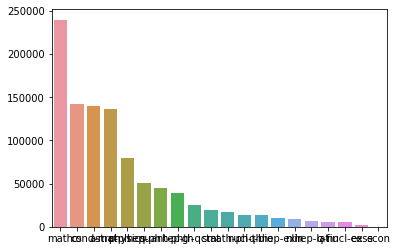

math        239569
cs          142098
cond-mat    139253
astro-ph    136341
physics      79035
hep-ph       50603
quant-ph     44679
hep-th       39013
gr-qc        25712
stat         19868
math-ph      17597
nucl-th      13730
q-bio        13316
hep-ex       10158
nlin          8934
hep-lat       6625
q-fin         5979
nucl-ex       5735
eess          1509
econ           246
dtype: int64


In [28]:
x=categories.value_counts()
sns.barplot(x=x.index,y=x)
plt.show()

print(x)

In [29]:
words_count = [len(abstract.split()) for abstract in abstracts]
chars_count = [len(abstract) for abstract in abstracts]

data2 = pd.DataFrame(data={'id': data['id'], 'abstract': abstracts, 'words_count': words_count, 'chars_count': chars_count, 'category': categories})

data2.head(5)

,id,abstract,words_count,chars_count,category
0,0704.0001,A fully differential calculation in perturbati...,140,980,hep-ph
1,0704.0002,"We describe a new algorithm, the $(k,\ell)$-pe...",115,795,math
2,0704.0003,The evolution of Earth-Moon system is describe...,144,877,physics
3,0704.0004,We show that a determinant of Stirling cycle n...,35,245,math
4,0704.0005,In this paper we show how to compute the $\Lam...,37,220,math


104.09450474512701
152.34497684719148


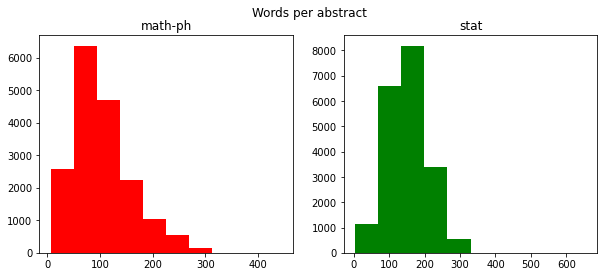

700.5255441268398
1040.3937487416952


In [30]:
cat_1 = 'math-ph'
cat_2 = 'stat'

category = 'stat'
print(data2[data2['category']==cat_1]['words_count'].mean())
print(data2[data2['category']==cat_2]['words_count'].mean())

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
n1_words=data2[data2['category']==cat_1]['words_count']
ax1.hist(n1_words,color='red')
ax1.set_title(cat_1)
n2_words=data2[data2['category']==cat_2]['words_count']
ax2.hist(n2_words,color='green')
ax2.set_title(cat_2)
fig.suptitle('Words per abstract')
plt.show()

print(data2[data2['category']==cat_1]['chars_count'].mean())
print(data2[data2['category']==cat_2]['chars_count'].mean())

In [38]:
%store data2

Stored 'data2' (DataFrame)
